In [2]:
#conda install -c districtdatalabs yellowbrick

## <b><div style='padding:15px;background-color:#003f88;color:white;border-radius:2px;font-size:110%;text-align: left'>UNSUPERVISED MACHINE LEARNING
</div></b>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### DATA OVERVIEW

In [4]:
#import dataset
data = pd.read_csv("Train .csv")
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [6]:
#statistical description of numerical data
data.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [7]:
#statistical description of categorical data
data.describe(include="object").T

,count,unique,top,freq
ID,4809,4809,tour_0,1
country,4809,105,UNITED STATES OF AMERICA,695
age_group,4809,4,25-44,2487
travel_with,3695,5,Alone,1265
purpose,4809,7,Leisure and Holidays,2840
main_activity,4809,9,Wildlife tourism,2259
info_source,4809,8,"Travel, agent, tour operator",1913
tour_arrangement,4809,2,Independent,2570
package_transport_int,4809,2,No,3357
package_accomodation,4809,2,No,2602


In [8]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [9]:
data.duplicated().sum()

0

# EDA 

In [10]:
# What are the top 5 countries with the highest spending statistic ?

country_total = data.groupby('country')['total_cost'].sum().reset_index()

Top5= country_total.sort_values('total_cost',ascending = False)

T5 = Top5.head()
T5

,country,total_cost
100,UNITED STATES OF AMERICA,8.890832e+09
99,UNITED KINGDOM,3.808383e+09
41,ITALY,3.762160e+09
29,FRANCE,3.344496e+09
3,AUSTRALIA,2.743132e+09


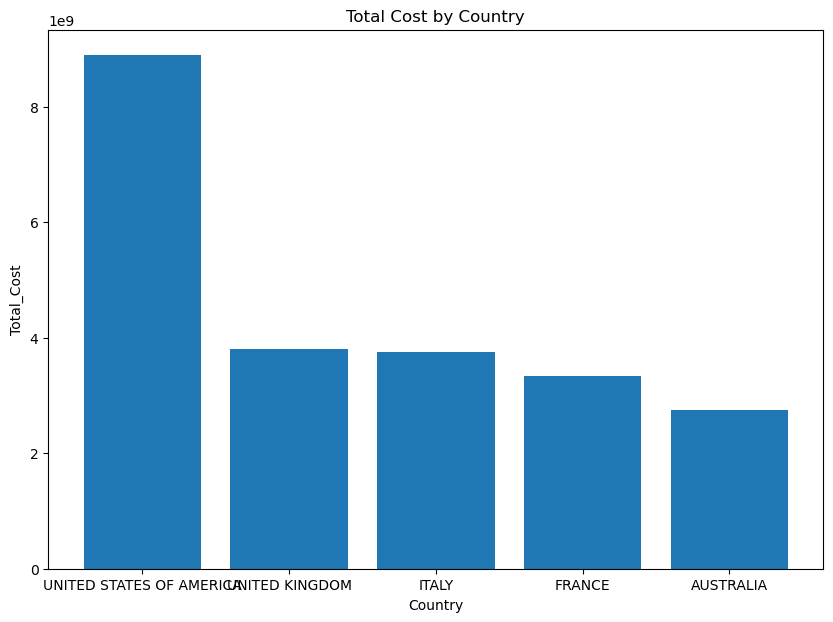

In [11]:
plt.figure(figsize=(10,7))
plt.bar(T5['country'],T5['total_cost'])
plt.title("Total Cost by Country")
plt.xlabel("Country")
plt.ylabel("Total_Cost")
plt.show()


In [12]:
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [13]:
## which age-group are the highest spenders and who are the over all highest spenders by travel with?

Age_Group = data.groupby('age_group')['total_cost'].sum().reset_index()

Age_Group

,age_group,total_cost
0,1-24,3.379088e+09
1,25-44,1.498710e+10
2,45-64,1.537184e+10
3,65+,5.284068e+09


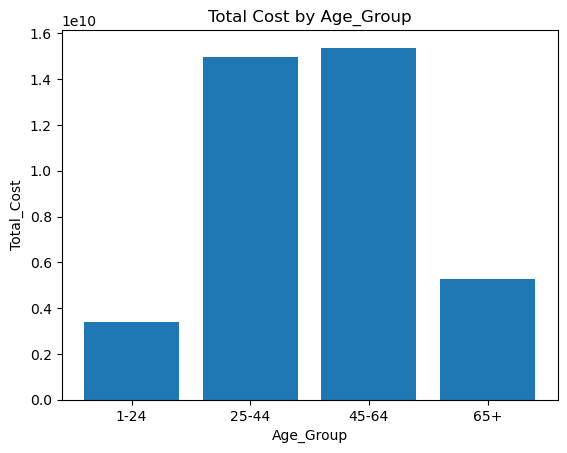

In [14]:
plt.bar(Age_Group['age_group'],Age_Group['total_cost'])
plt.title("Total Cost by Age_Group")
plt.xlabel("Age_Group")
plt.ylabel("Total_Cost")
plt.show()

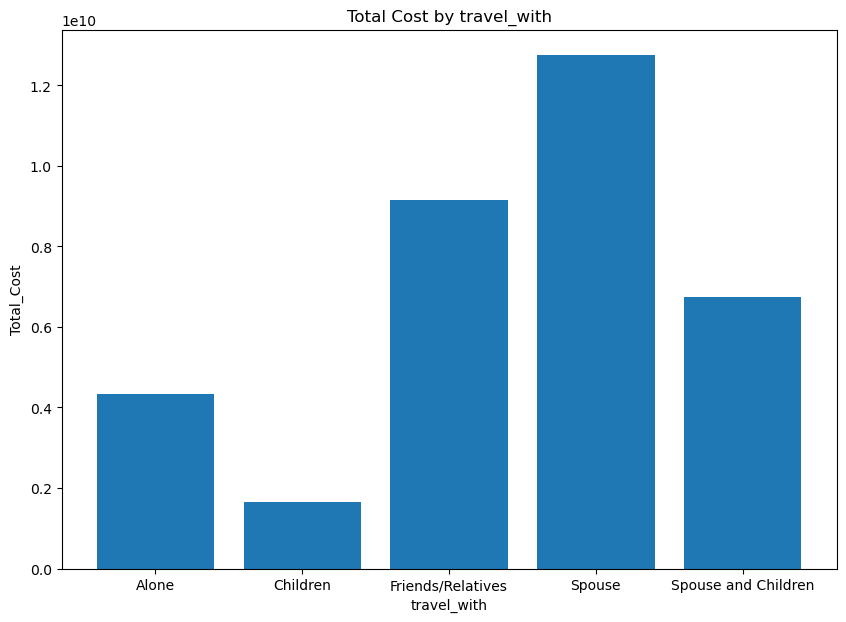

In [15]:
#which travel group have the most spending tourists?
Travel_With = data.groupby('travel_with')['total_cost'].sum().reset_index()


plt.figure(figsize=(10,7))
plt.bar(Travel_With['travel_with'],Travel_With['total_cost'])
plt.title("Total Cost by travel_with")
plt.xlabel("travel_with")
plt.ylabel("Total_Cost")
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [17]:
## what is the average number of nights a toursits spends in Tanzania mainland?

data['night_mainland'].mean()

8.488043252235393

In [18]:
# what is the average number of nights a toursits spends in Zanzibar?

data['night_zanzibar'].mean()

2.30442919525889

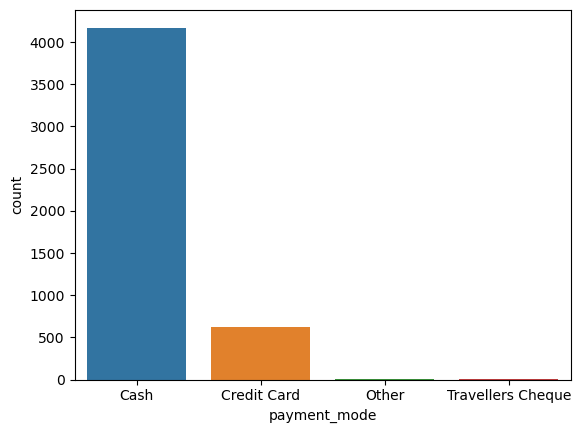

In [19]:
## what is the most prefered payment mode by tourists?

data['payment_mode'].value_counts()

sns.countplot(x='payment_mode',data=data);

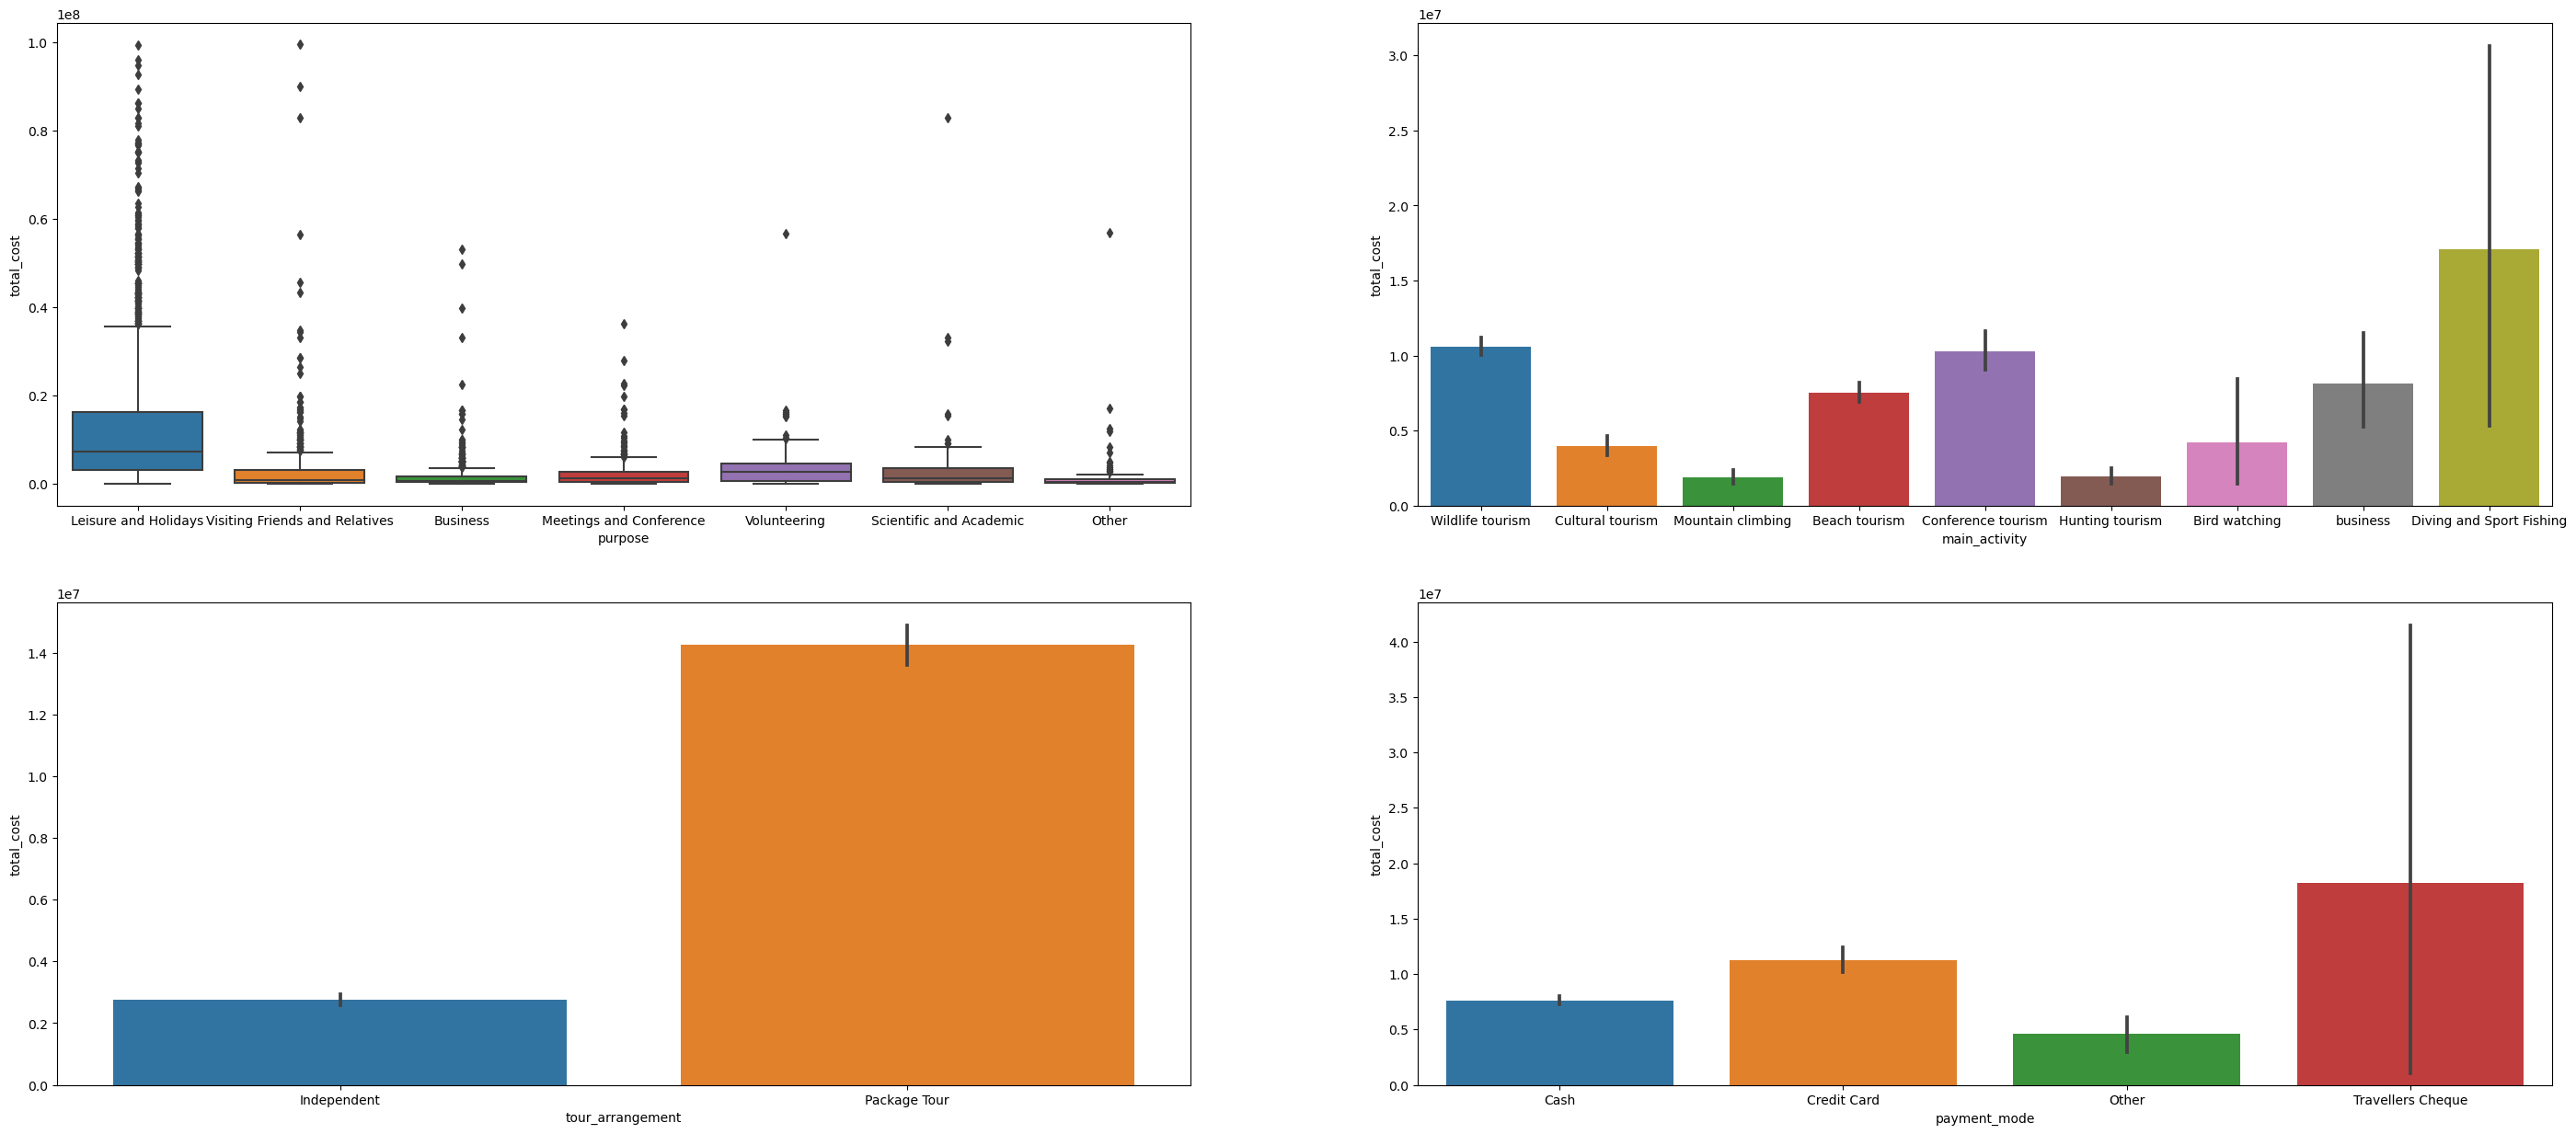

In [20]:
## Highlight the Aspects of tourism that are more profitable and in which it is worthwhile to invest in

fig,axs = plt.subplots(2,2, figsize=(35,15))


plt1 = sns.boxplot(data = data , x= data['purpose'],y =data['total_cost'], ax =axs[0,0])
plt2 = sns.barplot(data = data , x= data['main_activity'],y =data['total_cost'], ax =axs[0,1])
plt3 = sns.barplot(data = data , x= data['tour_arrangement'],y =data['total_cost'], ax =axs[1,0])
plt4 = sns.barplot(data = data , x= data['payment_mode'],y =data['total_cost'], ax =axs[1,1])

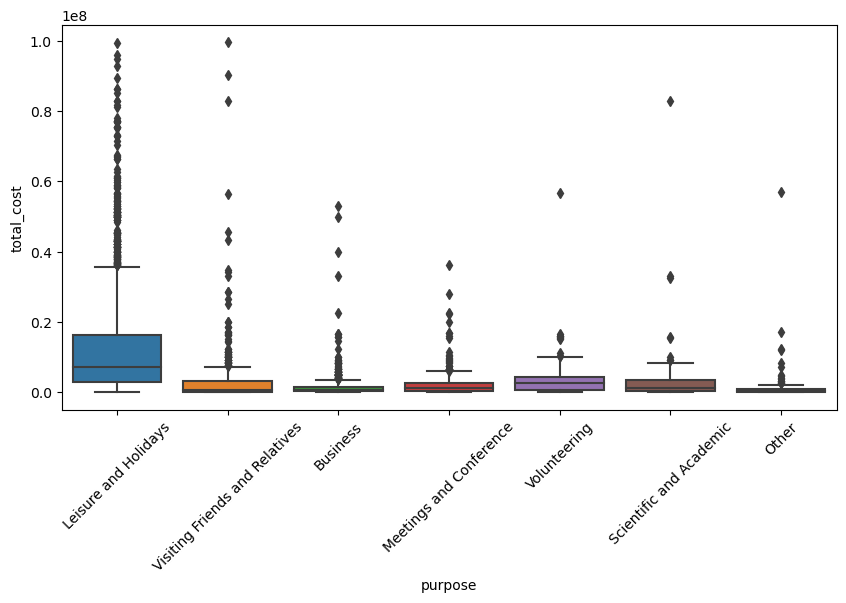

In [21]:
plt.figure(figsize=(10,5))

sns.boxplot(data = data , x= data['purpose'],y =data['total_cost'])
plt.xlabel ("purpose")
plt.ylabel('total_cost')
plt.xticks(rotation=45);

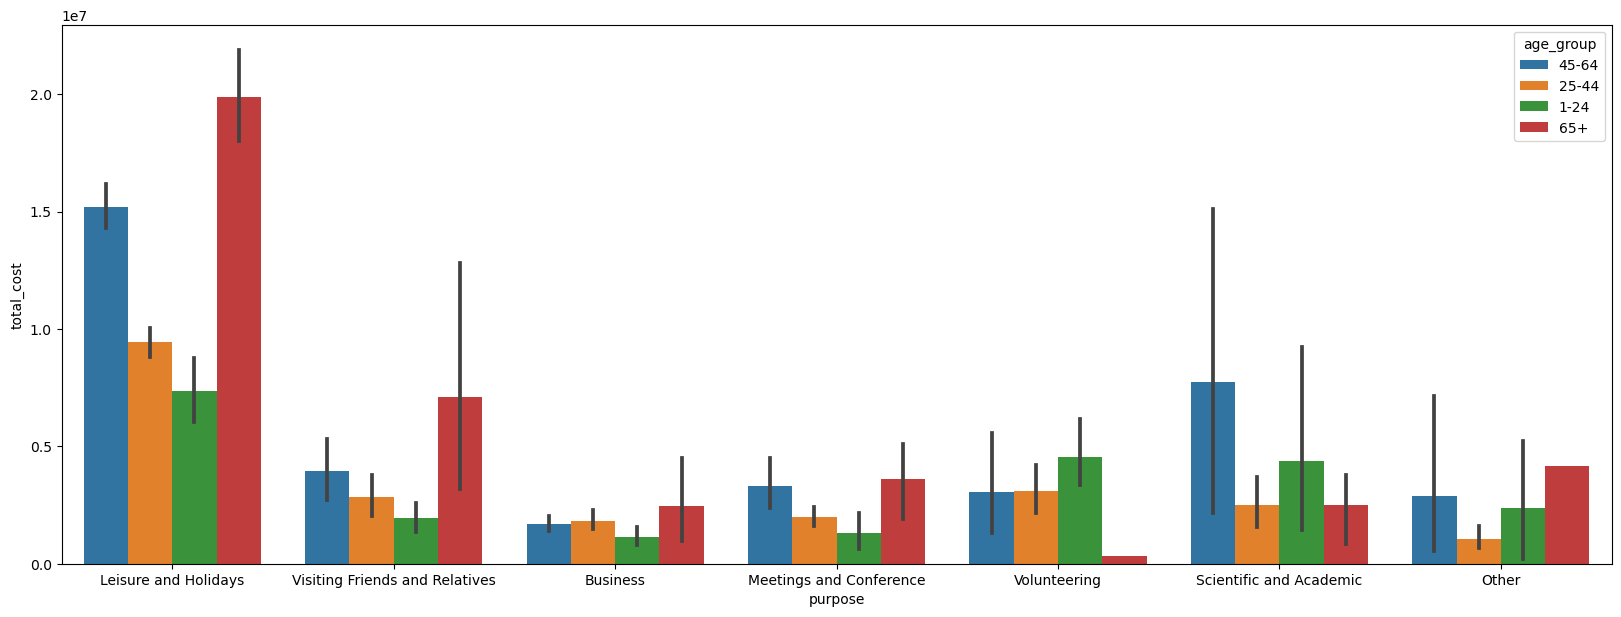

In [22]:
plt.figure(figsize=(20,7))
sns.barplot(data = data , x= data['purpose'],y =data['total_cost'], hue = 'age_group');

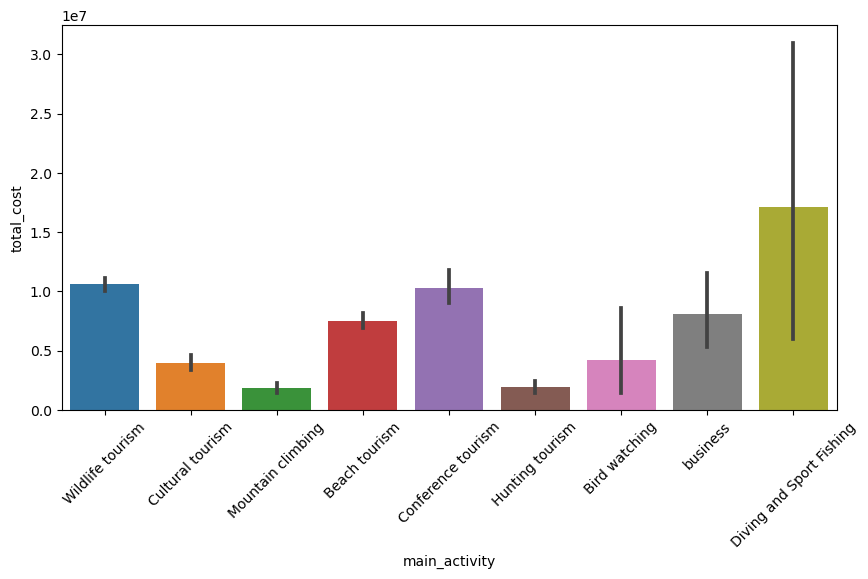

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data = data , x= data['main_activity'],y =data['total_cost'])

plt.xlabel ("main_activity")
plt.ylabel('total_cost')
plt.xticks(rotation=45);

<Axes: xlabel='age_group', ylabel='total_cost'>

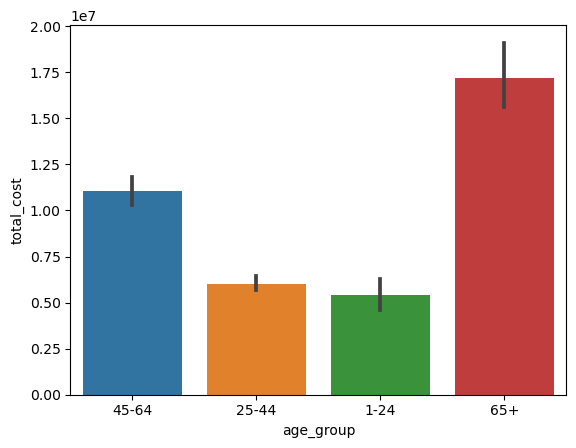

In [24]:
sns.barplot(data = data , x= data['age_group'],y =data['total_cost'])

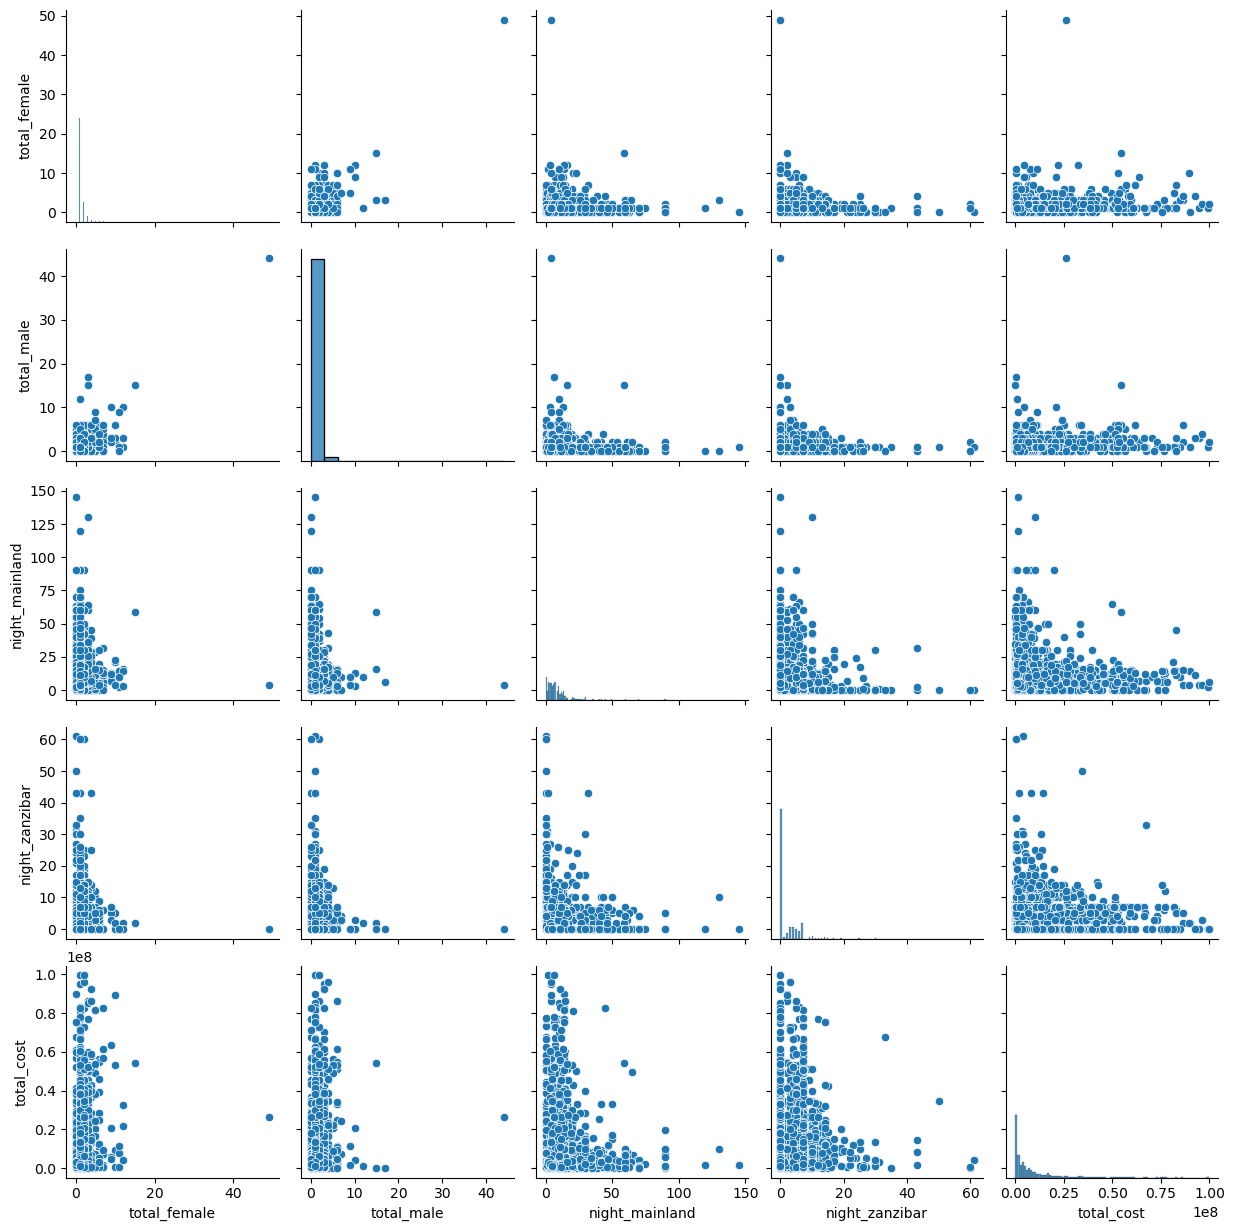

In [25]:
sns.pairplot(data)

### DATA PREPROCESSING
- Data Cleaning
- Varaiable Encoding
- Data normalization

In [26]:
#creating a copy of the dataset
data2 = data.copy()

In [27]:
#Data cleaning
#identifying missing data points and handling them
data2.dropna( inplace=True)

In [28]:
data3 = data2.copy()

In [29]:
data2.isna().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

In [30]:
#importing libraries for encoding
from sklearn.preprocessing import LabelEncoder

In [31]:
#creating a copy of the dataset
data2.dtypes


ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

In [32]:
cat_var = data2.dtypes == "object"
cat_var

ID                        True
country                   True
age_group                 True
travel_with               True
total_female             False
total_male               False
purpose                   True
main_activity             True
info_source               True
tour_arrangement          True
package_transport_int     True
package_accomodation      True
package_food              True
package_transport_tz      True
package_sightseeing       True
package_guided_tour       True
package_insurance         True
night_mainland           False
night_zanzibar           False
payment_mode              True
first_trip_tz             True
most_impressing           True
total_cost               False
dtype: bool

In [33]:
cat_var = data2.dtypes == "object"
cat_var[cat_var]

ID                       True
country                  True
age_group                True
travel_with              True
purpose                  True
main_activity            True
info_source              True
tour_arrangement         True
package_transport_int    True
package_accomodation     True
package_food             True
package_transport_tz     True
package_sightseeing      True
package_guided_tour      True
package_insurance        True
payment_mode             True
first_trip_tz            True
most_impressing          True
dtype: bool

In [34]:
cat_var = data2.dtypes == "object"
cat_feat = list(cat_var[cat_var].index)

cat_feat

['ID',
 'country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'payment_mode',
 'first_trip_tz',
 'most_impressing']

In [35]:
data.head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0


In [36]:
# encode categorical data into numeriacal data
cat_var = data2.dtypes == "object"
cat_feat = list(cat_var[cat_var].index)

encoder = LabelEncoder()
for x in cat_feat:
    data2[x] = data2[[x]].apply(encoder.fit_transform)
    
data2    

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,0,82,2,2,1.0,1.0,1,7,0,0,...,0,0,0,0,13.0,0.0,0,0,2,674602.5
2,1,92,1,0,0.0,1.0,5,3,0,0,...,0,0,0,0,1.0,31.0,0,0,1,3315000.0
3,2,92,1,3,1.0,1.0,1,7,5,1,...,1,1,1,0,11.0,0.0,0,1,2,7790250.0
6,3,76,2,0,0.0,1.0,0,6,0,0,...,0,0,0,0,9.0,0.0,0,1,2,466140.0
7,4,93,2,2,1.0,1.0,1,7,5,1,...,1,1,1,1,10.0,3.0,0,1,2,3480750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,3455,29,0,2,2.0,0.0,1,0,1,0,...,0,0,0,0,12.0,7.0,0,1,4,331500.0
4804,3456,88,2,0,0.0,1.0,0,5,0,0,...,0,0,0,0,2.0,0.0,1,0,4,3315000.0
4805,3457,93,1,3,1.0,1.0,1,7,5,1,...,1,1,1,1,11.0,0.0,0,1,2,10690875.0
4807,3458,76,1,2,1.0,1.0,0,0,5,0,...,0,0,0,0,5.0,0.0,1,0,2,1160250.0


In [37]:
# Data Normalisation

#import scaler from library
from sklearn.preprocessing import MinMaxScaler

#instantiate the scaler object
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data2),columns=data2.columns)
scaled_data

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,0.000000,0.845361,0.666667,0.50,0.020408,0.022727,0.166667,0.875,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.089655,0.000000,0.000000,0.0,0.333333,0.006288
1,0.000289,0.948454,0.333333,0.00,0.000000,0.022727,0.833333,0.375,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.006897,0.508197,0.000000,0.0,0.166667,0.032829
2,0.000578,0.948454,0.333333,0.75,0.020408,0.022727,0.166667,0.875,0.714286,1.0,...,1.0,1.0,1.0,0.0,0.075862,0.000000,0.000000,1.0,0.333333,0.077814
3,0.000867,0.783505,0.666667,0.00,0.000000,0.022727,0.000000,0.750,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.062069,0.000000,0.000000,1.0,0.333333,0.004193
4,0.001156,0.958763,0.666667,0.50,0.020408,0.022727,0.166667,0.875,0.714286,1.0,...,1.0,1.0,1.0,1.0,0.068966,0.049180,0.000000,1.0,0.333333,0.034496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,0.998844,0.298969,0.000000,0.50,0.040816,0.000000,0.166667,0.000,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.082759,0.114754,0.000000,1.0,0.666667,0.002840
3456,0.999133,0.907216,0.666667,0.00,0.000000,0.022727,0.000000,0.625,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.013793,0.000000,0.333333,0.0,0.666667,0.032829
3457,0.999422,0.958763,0.333333,0.75,0.020408,0.022727,0.166667,0.875,0.714286,1.0,...,1.0,1.0,1.0,1.0,0.075862,0.000000,0.000000,1.0,0.333333,0.106971
3458,0.999711,0.783505,0.333333,0.50,0.020408,0.022727,0.000000,0.000,0.714286,0.0,...,0.0,0.0,0.0,0.0,0.034483,0.000000,0.333333,0.0,0.333333,0.011170


### **UNSUPERVISED ML SECTION**
- **DIMENSIONALITY REDUCTION (FEATURE DECOMPOSITION)** : More input features often make a predictive modelling task more challenging to model, more generally referred to as the curse of dimensionality.
thus,Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.

 - Principal Component Analysis (PCA) is a technique for redcuing the dimensions of a large dataset, increasing the interpreatblilty and at the same minimizing information loss
 - other exmaples of Dimensionality Reduction techniques include Self Organizing Maps (SOM), t-distributed Stochastic Neighbor Embedding (t-SNE) etc.
- **CLUSTERING**:
 Clustering is the process of arranging a group of objects in such a manner that the objects in the same group (which is referred to as a cluster) are more similar to each other than to the objects in any other group
  - Kmeans Clustering Algorithm : It is a centroid-based algorithm where the user must define the required number of clusters it wants to create
  - other examples of clustering algorithms are Agglomerative CL, DBSCAN, Spectral Clustering etc.


In [38]:
#importing required libraries for decomposition, elbow visualizing and clustering
from sklearn.decomposition import PCA

In [39]:
#dimensionality reduction using PCA
#instantiate pca algo
pca = PCA(n_components=3)

pca_df = pd.DataFrame(pca.fit_transform(scaled_data),columns=["dim1","dim2","dim3"])
pca_df

,dim1,dim2,dim3
0,-1.284626,-0.359692,0.453020
1,-1.422873,-0.185775,0.560989
2,1.185569,-0.746153,-0.314717
3,-1.168339,-0.237909,-0.409591
4,1.628546,-0.197214,0.040169
...,...,...,...
3455,-1.187059,0.474915,-0.502611
3456,-1.371074,-0.295002,0.569240
3457,1.627942,-0.073296,0.011835
3458,-0.188020,0.787072,0.868392


In [40]:
# Get the loadings (Feature importance) 
loadings = pca.components_

# Create a DataFrame for better readability
loading_df = pd.DataFrame(loadings, columns=scaled_data.columns, index=['dim1', 'dim2', 'dim3'])

print(loading_df)

            ID   country  age_group  travel_with  total_female  total_male  \
dim1 -0.013608 -0.044209   0.056872     0.113211      0.003872    0.001215   
dim2  0.037564 -0.155985  -0.086201     0.238831      0.006053    0.005672   
dim3  0.031023  0.093282   0.073869    -0.138718     -0.005182   -0.000738   

       purpose  main_activity  info_source  tour_arrangement  ...  \
dim1 -0.066125       0.052001     0.128450          0.399146  ...   
dim2 -0.000907      -0.516798     0.015844          0.086291  ...   
dim3  0.039197      -0.062167    -0.076696          0.093199  ...   

      package_transport_tz  package_sightseeing  package_guided_tour  \
dim1              0.375314             0.319684             0.327115   
dim2             -0.038637            -0.425854            -0.384673   
dim3              0.074962            -0.047142            -0.050533   

      package_insurance  night_mainland  night_zanzibar  payment_mode  \
dim1           0.169890       -0.004362        0

High absolute values in the loading matrix indicate that the original feature contributes significantly to the principal component. Positive values indicate a positive correlation, while negative values indicate a negative correlation.

In [42]:
#eigen values for the new data  #the more the number of components the more it affect the performance of our pca, and the numbers keeps dropping, hence keep it short
pca.explained_variance_ratio_


array([0.49110188, 0.07528233, 0.05993253])

- The pca.explained_variance_ratio_ attribute in PCA provides the proportion of the dataset's variance that is captured by each principal component. This helps in understanding how much information (variance) each principal component retains from the original dataset
- dim1 is the most informative, capturing nearly half of the variance. This suggests that this component is highly influential and can provide significant insights into the underlying structure of the data.
- dim2 and dim3 together capture an additional 13.52% of the variance. Although they contribute less information individually, combined with dim1, they account for a total of around 62.64% of the variance in the data.

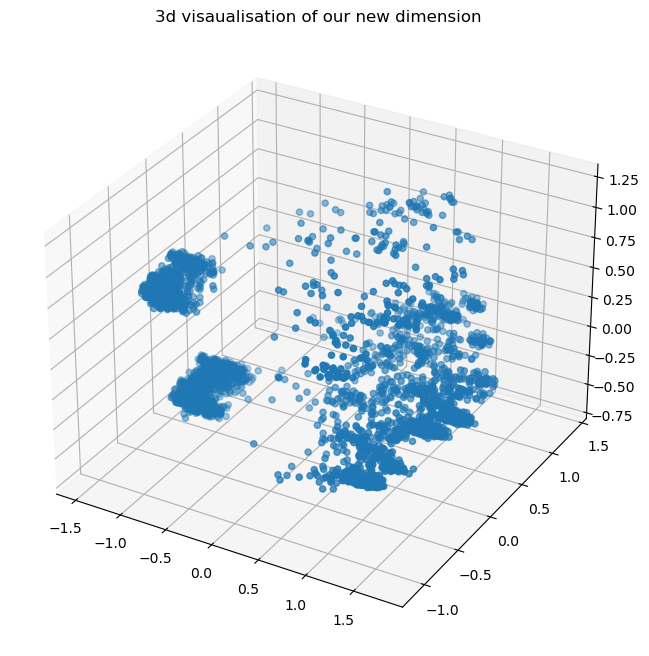

In [44]:
#visualizing our new data dimensions
x = pca_df["dim1"]
y = pca_df["dim2"]
z = pca_df["dim3"]

fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,marker="o")
ax.set_title("3d visaualisation of our new dimension");


In [45]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

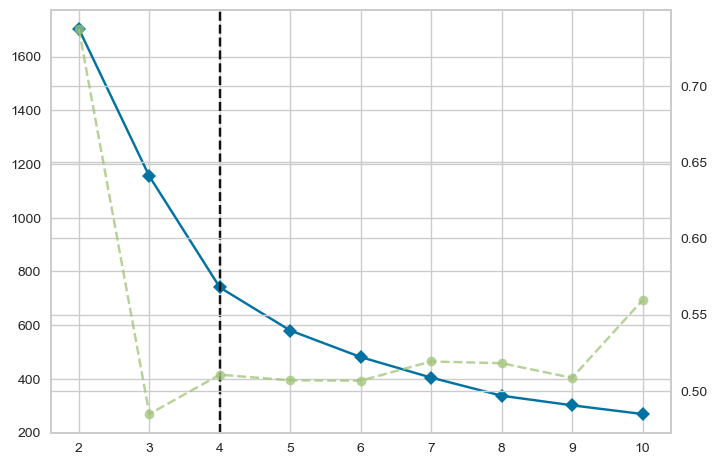

In [46]:
#clustering section
#using the k elbow visualizer method to figure the appropriate number of clusters
elbow_k = KElbowVisualizer(estimator=KMeans())
elbow_k.fit(pca_df)


In [47]:
data3

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,9.0,0.0,Cash,Yes,Friendly People,466140.0
7,tour_1008,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,10.0,3.0,Cash,Yes,Friendly People,3480750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,tour_991,GERMANY,1-24,Friends/Relatives,2.0,0.0,Leisure and Holidays,Beach tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,12.0,7.0,Cash,Yes,No comments,331500.0
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0


In [48]:
#apply kmeans clustering on our new dimensions to generate clusters
kmeans = KMeans(n_clusters=4,random_state=42)
pred_clust = kmeans.fit_predict(pca_df)

pca_df["clusters"] = pred_clust
data3["clusters"] = pred_clust


In [49]:
pca_df,pca_df["clusters"]

(          dim1      dim2      dim3  clusters
 0    -1.284626 -0.359692  0.453020         2
 1    -1.422873 -0.185775  0.560989         2
 2     1.185569 -0.746153 -0.314717         0
 3    -1.168339 -0.237909 -0.409591         1
 4     1.628546 -0.197214  0.040169         0
 ...        ...       ...       ...       ...
 3455 -1.187059  0.474915 -0.502611         1
 3456 -1.371074 -0.295002  0.569240         2
 3457  1.627942 -0.073296  0.011835         0
 3458 -0.188020  0.787072  0.868392         3
 3459  1.460825 -0.215097 -0.056093         0
 
 [3460 rows x 4 columns],
 0       2
 1       2
 2       0
 3       1
 4       0
        ..
 3455    1
 3456    2
 3457    0
 3458    3
 3459    0
 Name: clusters, Length: 3460, dtype: int32)

Text(0.5, 0.92, '3d visaualisation of our new dimension')

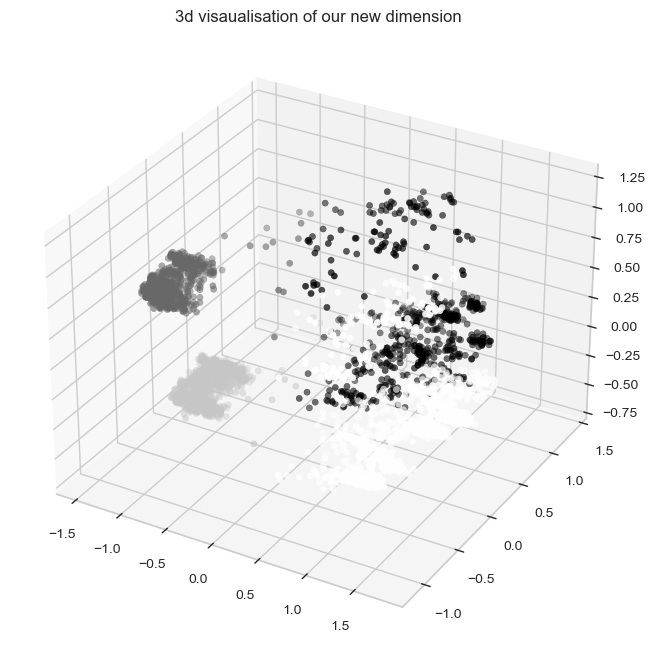

In [50]:
#plotting new data points
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=pca_df.clusters,marker="o")
ax.set_title("3d visaualisation of our new dimension")


Text(0.5, 0.92, '3d visaualisation of our new dimension')

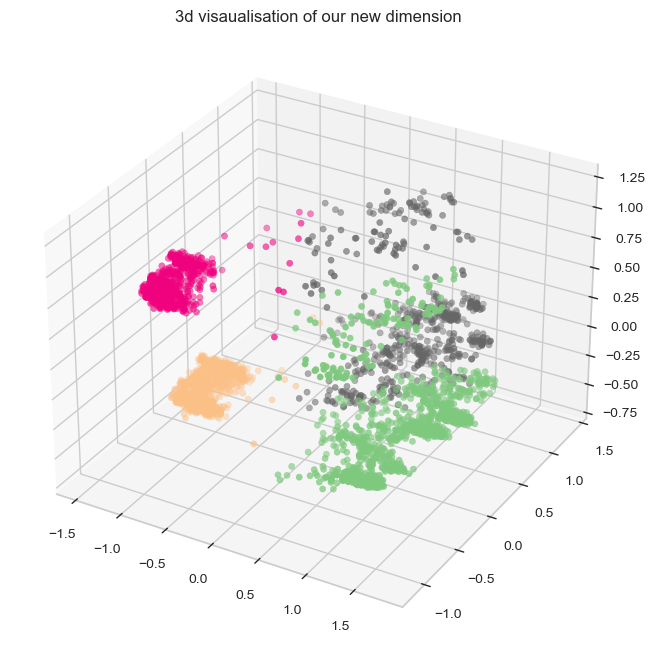

In [51]:
cmap= "Accent"
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=pca_df.clusters,marker="o",cmap=cmap)
ax.set_title("3d visaualisation of our new dimension")


In [53]:
## Cluster profiling
#Get cluster centers in the PCA space
cluster_centers_pca = kmeans.cluster_centers_

print(cluster_centers_pca)

[[ 1.28081646 -0.29282813 -0.03353693]
 [-1.12854526  0.07411379 -0.47743811]
 [-1.30948312 -0.1696032   0.48673707]
 [ 0.6876413   0.7111418   0.15533618]]


## Interpretations 

-  Cluster 0 : is characterized by features that contribute negatively to dim1 and dim2 but positively to dim3. These tourists likely have lower values on the features that load highly on dim1 and dim2, and higher values on those that load on dim3.

-  Cluster 1 : shows high values on the features that load highly on dim1 but lower on those associated with dim2. This could represent tourists who emphasize particular features strongly correlated with dim1.

- Cluster 2 : has above-average values on all three principal components, suggesting these tourists emphasize a mix of features represented by dim1, dim2, and dim3.

- Cluster 3 : Cluster 3 tends to have lower values on the features that load highly on dim1 and dim3, with near-average values on those related to dim2. This might indicate a group of tourists who downplay the features correlated with dim1 and dim3.

In [54]:
# Calculate mean and standard deviation for numerical features
cluster_summary = pca_df.groupby('clusters').agg(['mean', 'std']).reset_index()
cluster_summary

clusters      dim1                dim2                dim3          
                mean       std      mean       std      mean       std
0        0  1.280126  0.302796 -0.292072  0.351915 -0.033728  0.301239
1        1 -1.128545  0.118397  0.074114  0.229102 -0.477438  0.075946
2        2 -1.309483  0.144077 -0.169603  0.222497  0.486737  0.076892
3        3  0.687075  0.348332  0.712959  0.382139  0.156369  0.377946

In [55]:
# Inverse transform to get cluster centers in the original feature space
cluster_centers_original = pca.inverse_transform(cluster_centers_pca)

# Create a DataFrame for cluster centers
cluster_centers_df = pd.DataFrame(data=cluster_centers_original, columns=scaled_data.columns)
cluster_centers_df['Cluster'] = range(4)

print(cluster_centers_df)

         ID   country  age_group  travel_with  total_female  total_male  \
0  0.470530  0.605531   0.541079     0.525672      0.025821    0.025557   
1  0.503330  0.613400   0.339633     0.402120      0.021014    0.025039   
2  0.526549  0.749355   0.421574     0.189680      0.013842    0.022725   
3  0.522175  0.492768   0.434753     0.672097      0.028623    0.030391   

    purpose  main_activity  info_source  tour_arrangement  ...  \
0  0.176058       0.778294     0.616252          1.011163  ...   
1  0.317645       0.490967     0.346629          0.039768  ...   
2  0.367624       0.547570     0.245577          0.036377  ...   
3  0.221775       0.216858     0.541480          0.878635  ...   

   package_sightseeing  package_guided_tour  package_insurance  \
0             0.892099             0.898630           0.351320   
1            -0.013474            -0.008229          -0.031341   
2            -0.012982            -0.022388          -0.035543   
3             0.266021       

In [56]:
# Get PCA loadings
loadings = pca.components_
loading_df = pd.DataFrame(loadings, columns=scaled_data.columns, index=['dim1', 'dim2', 'dim3'])

print(loading_df)

# Describe clusters
for i in range(4):  # Adjust the range based on the number of clusters
    print(f"Cluster {i} Profile:")
    print(cluster_centers_df.loc[cluster_centers_df['Cluster'] == i].drop(columns=['Cluster']).T)
    print("\n")

            ID   country  age_group  travel_with  total_female  total_male  \
dim1 -0.013608 -0.044209   0.056872     0.113211      0.003872    0.001215   
dim2  0.037564 -0.155985  -0.086201     0.238831      0.006053    0.005672   
dim3  0.031023  0.093282   0.073869    -0.138718     -0.005182   -0.000738   

       purpose  main_activity  info_source  tour_arrangement  ...  \
dim1 -0.066125       0.052001     0.128450          0.399146  ...   
dim2 -0.000907      -0.516798     0.015844          0.086291  ...   
dim3  0.039197      -0.062167    -0.076696          0.093199  ...   

      package_transport_tz  package_sightseeing  package_guided_tour  \
dim1              0.375314             0.319684             0.327115   
dim2             -0.038637            -0.425854            -0.384673   
dim3              0.074962            -0.047142            -0.050533   

      package_insurance  night_mainland  night_zanzibar  payment_mode  \
dim1           0.169890       -0.004362        0

- Dim1: The first principal component has high loadings on tour arrangement, package transport int, package sightseeing, package guided tour, and total cost. This suggests it captures variance related to package services and expenditures.
- Dim2: The second principal component has high loadings on main activity and negatively on package sightseeing and package guided tour. This dimension seems to capture variance related to the main activities of tourists and their package preferences.
- Dim3: The third principal component has loadings indicating some relation to country and travel with, but with less distinct patterns compared to Dim1 and Dim2.

### CLUSTERING MODEL EVALUATION
There isn't a sure or single most appropriate way to evaluate a clustering algorithm, as this can vary by the nature of problem
being solved, the domain of that problem, and the business metric of the domain in light.
For this Case Study, we are going to be using the Silhouette score in evaluating our model's performance, Feel free to research, explore and experiment with other methods for evaluating clustering algortihms
> The silhouette coefficient measures how close the data points are to their clusters compared to other clusters. The silhouette coefficient values range from -1 to 1, where the closer the values are to 1, the better they are.

In [47]:
#import evaluation metric
from sklearn.metrics import silhouette_score

In [48]:
# Calculate the silhouette score
score = silhouette_score(pca_df,pca_df["clusters"],metric='euclidean')
print(f"silhouette_score is: {score}")

silhouette_score is: 0.7136773297506086


### Now Carry EDA post Feature Engineering

<Axes: xlabel='clusters', ylabel='count'>

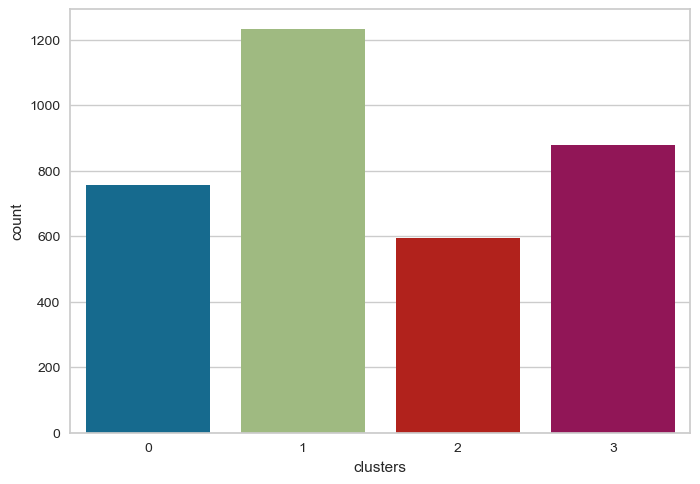

In [49]:
#univariate distribution of the new feature
sns.countplot(x=data3.clusters)

In [50]:
#distribution of the total cost by clusters feature


<Axes: xlabel='clusters', ylabel='total_cost'>

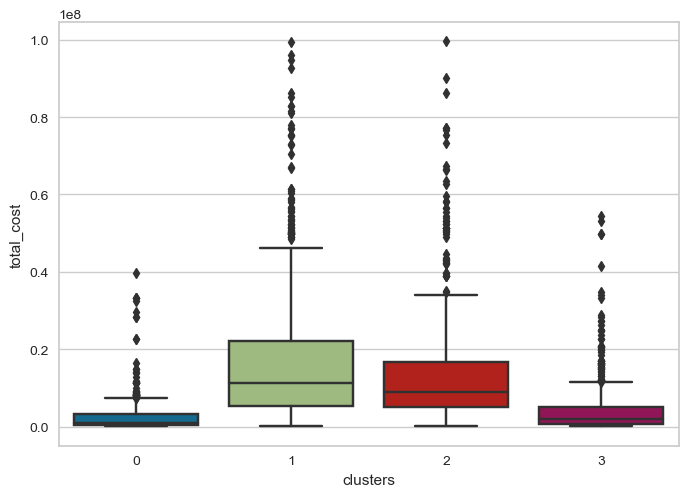

In [51]:
#bivariate analysis btw total cost vs clusters feature
sns.boxplot(x="clusters",y="total_cost", data=data3)


In [69]:
countries = data3.groupby("country")["total_cost"].sum().reset_index()
Top_5= countries.sort_values('total_cost',ascending = False)

T_5 = Top_5.head()
T_5

,country,total_cost
93,UNITED STATES OF AMERICA,7.527403e+09
38,ITALY,3.384829e+09
92,UNITED KINGDOM,3.326265e+09
27,FRANCE,3.123268e+09
3,AUSTRALIA,2.474086e+09


<Axes: xlabel='country', ylabel='total_cost'>

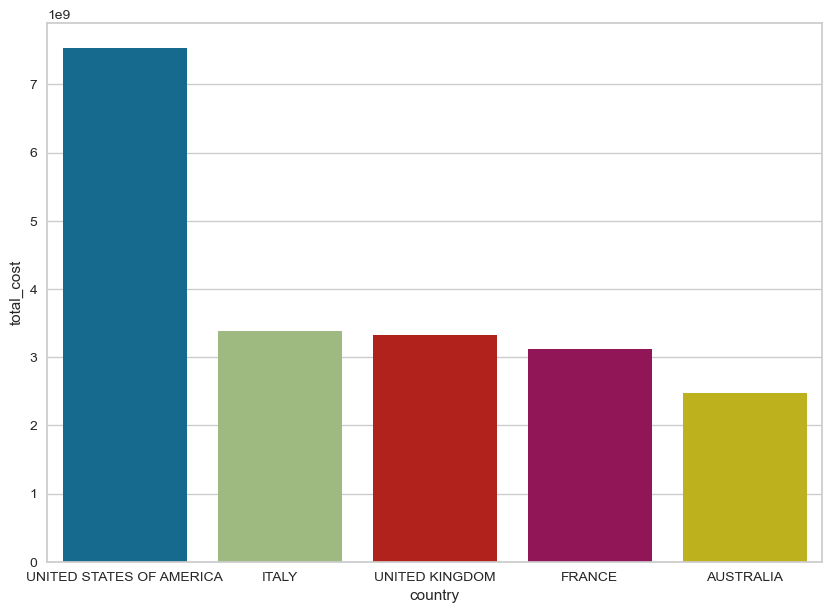

In [73]:
plt.figure(figsize=(10,7))
sns.barplot(data=T_5, x="country", y="total_cost")



<Axes: xlabel='age_group', ylabel='total_cost'>

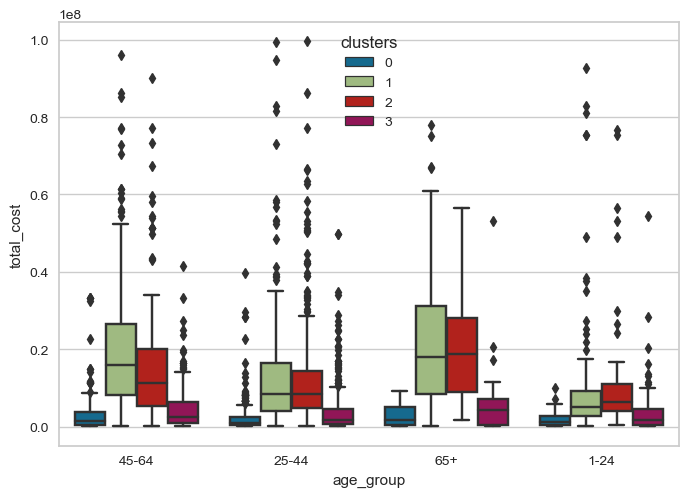

In [52]:
#multivariate distribution between the total cost vs age_group vs new clusters featuressns.boxplot( )
sns.boxplot(x="age_group",y="total_cost",hue="clusters",data=data3)

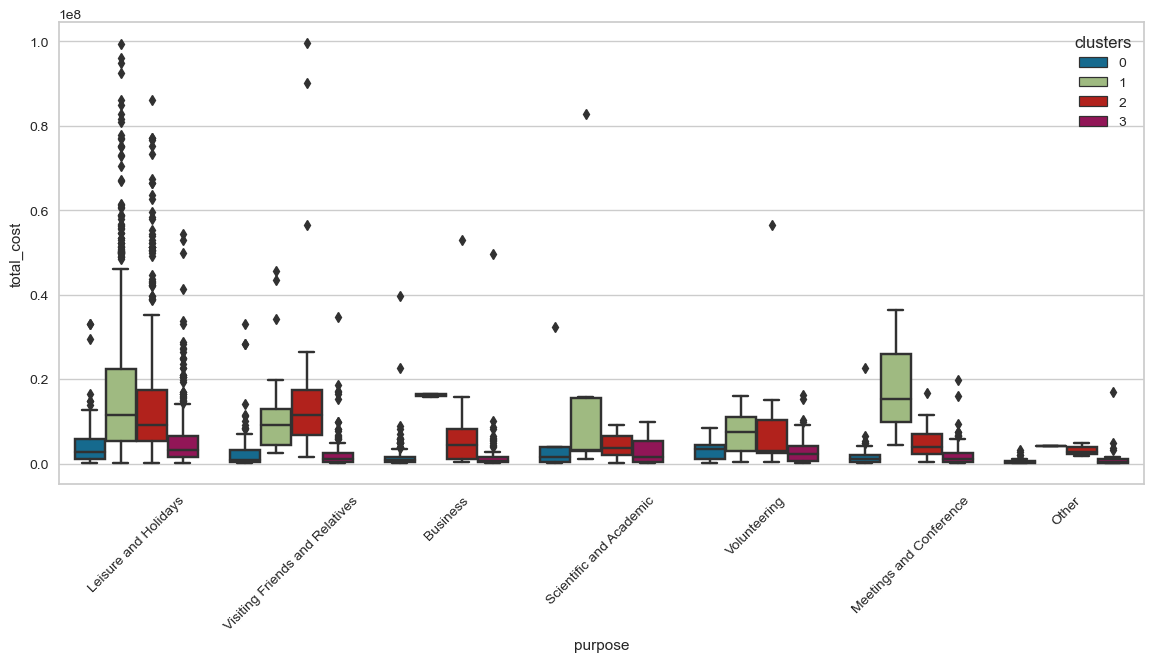

In [59]:
#mulitvariate analysis btw the total_cost vs purpose vs clusters feature
plt.figure(figsize=(14,6))
sns.boxplot(x="purpose",y="total_cost",hue="clusters",data=data3)
plt.xticks(rotation=45);

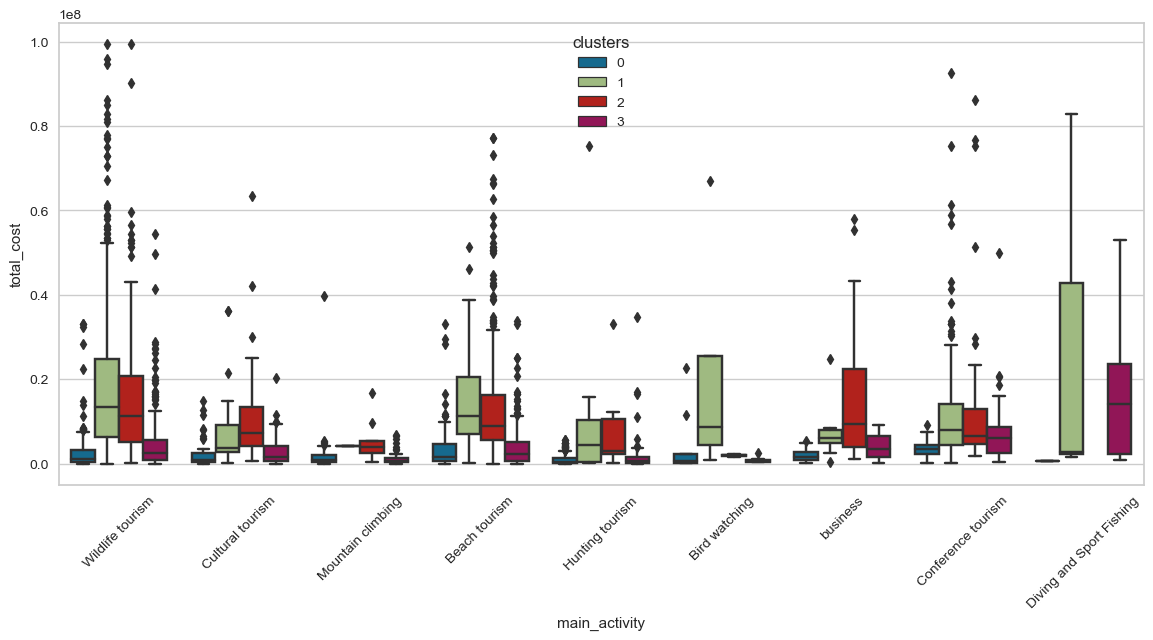

In [55]:
#mulitvariate analysis btw the total_cost vs purpose vs clusters feature
plt.figure(figsize=(14,6))
sns.boxplot(x="main_activity",y="total_cost",hue="clusters",data=data3)
plt.xticks(rotation=45);

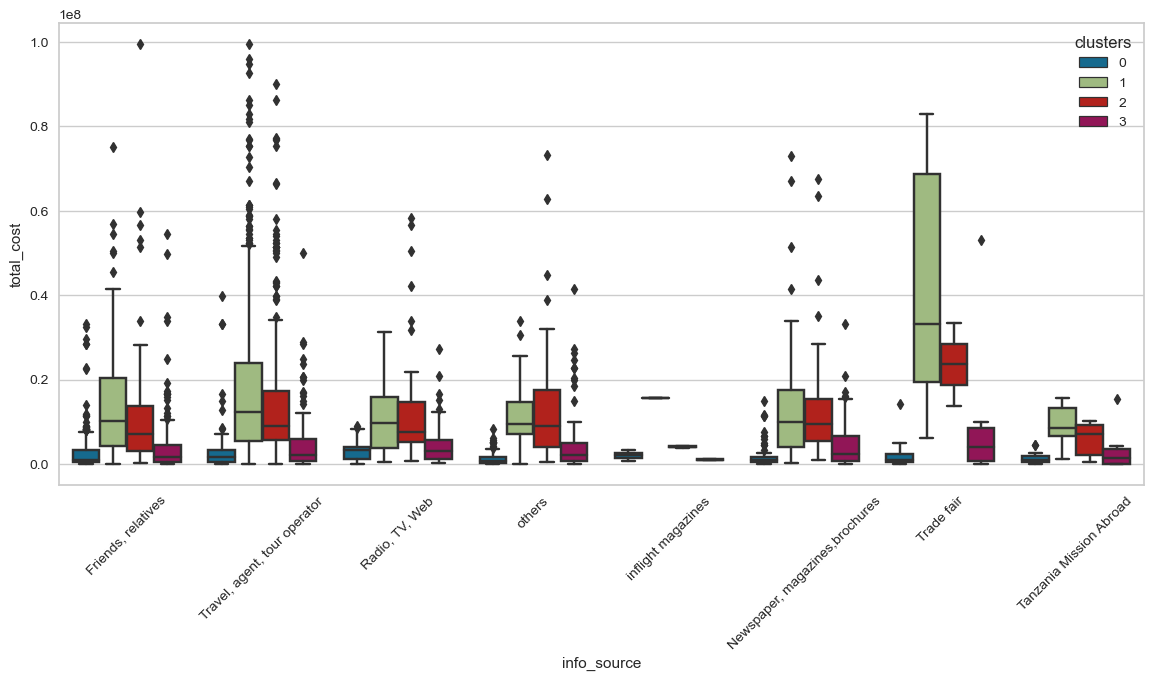

In [56]:
#mulitvariate analysis btw the total_cost vs info_source vs clusters feature
plt.figure(figsize=(14,6))
sns.boxplot(x="info_source",y="total_cost",hue="clusters",data=data3)
plt.xticks(rotation=45);

<Axes: xlabel='tour_arrangement', ylabel='total_cost'>

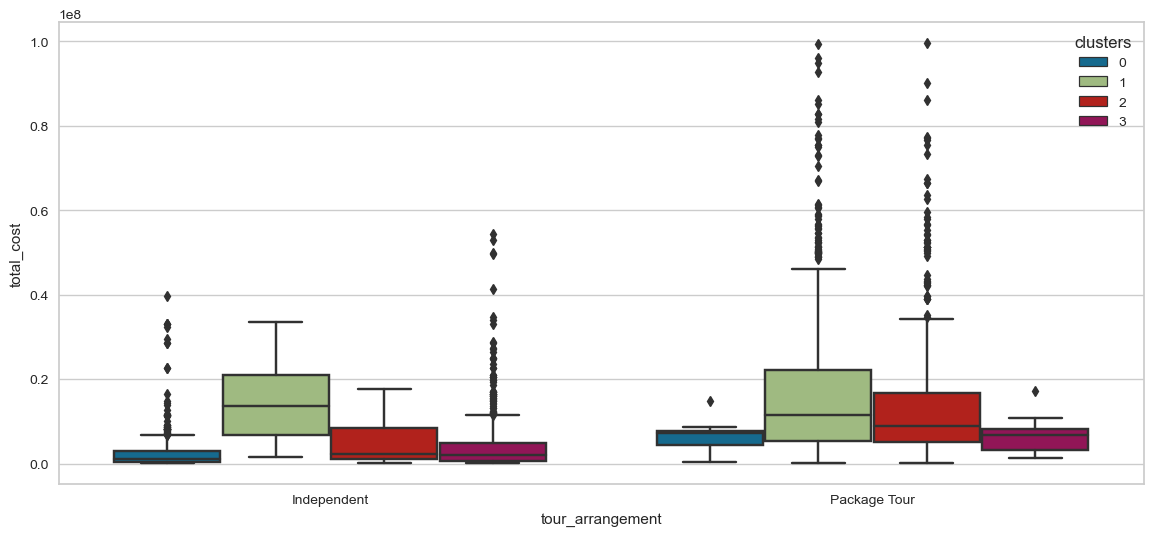

In [57]:
#mulitvariate analysis btw the total_cost vs tour_arrangement vs clusters feature
plt.figure(figsize=(14,6))
sns.boxplot(x="tour_arrangement",y="total_cost",hue="clusters",data=data3)


<Axes: xlabel='package_guided_tour', ylabel='total_cost'>

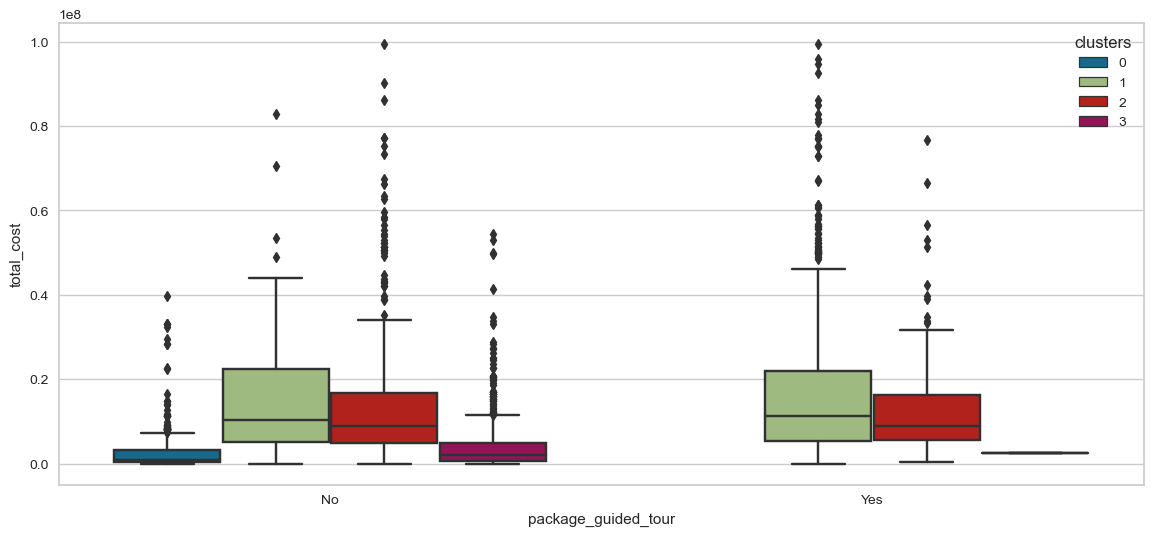

In [58]:
#mulitvariate analysis btw the total_cost vs purpose vs clusters feature
plt.figure(figsize=(14,6))
sns.boxplot(x="package_guided_tour",y="total_cost",hue="clusters",data=data3)


In [54]:
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


<Axes: xlabel='first_trip_tz', ylabel='total_cost'>

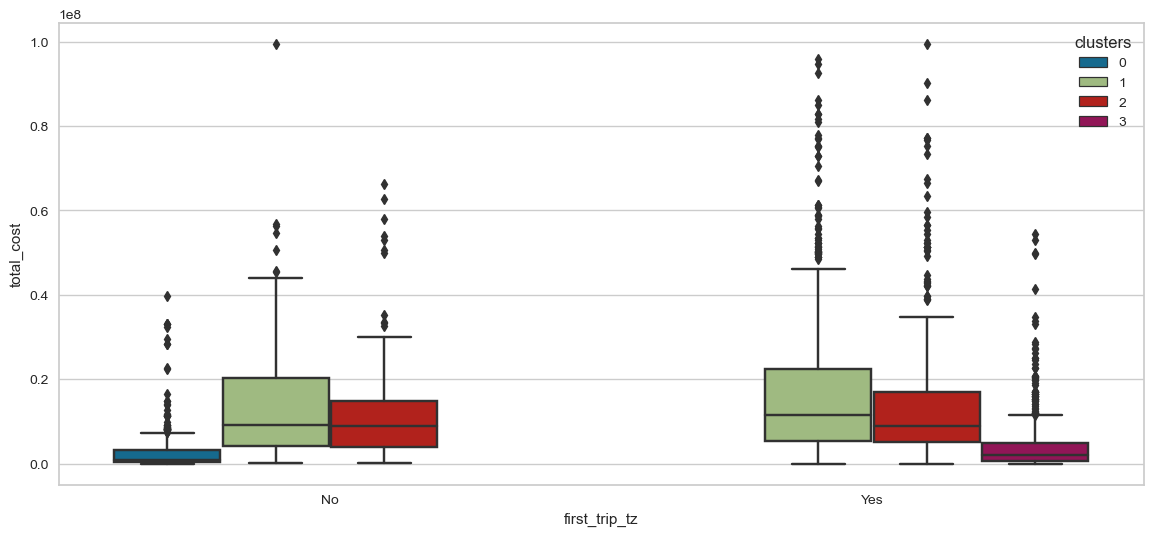

In [60]:
#mulitvariate analysis btw the total_cost vs purpose vs clusters feature
plt.figure(figsize=(14,6))
sns.boxplot(x="first_trip_tz",y="total_cost",hue="clusters",data=data3)


<Axes: xlabel='travel_with', ylabel='total_cost'>

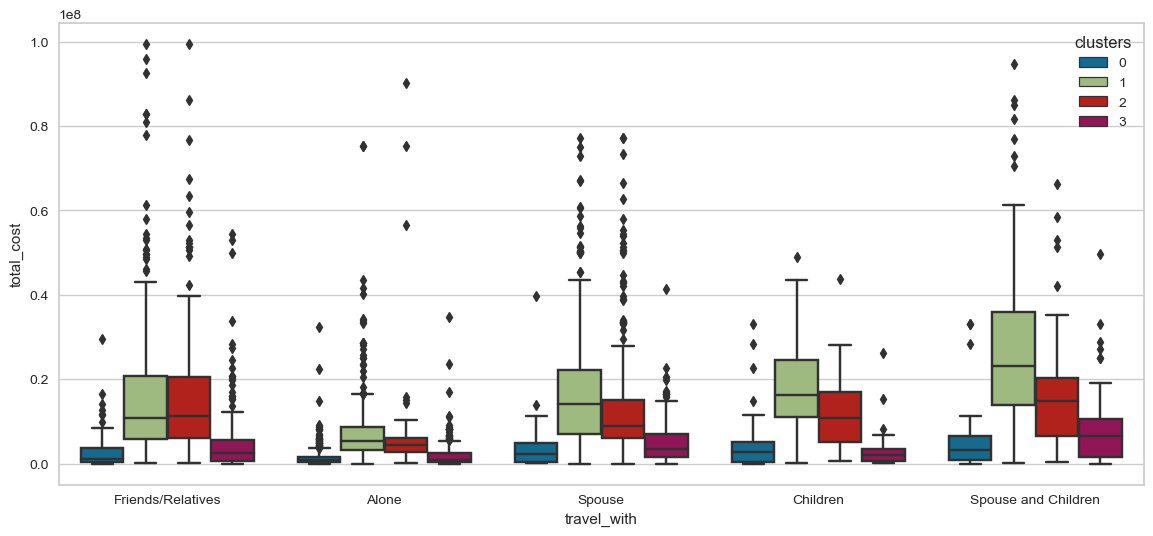

In [94]:
#mulitvariate analysis btw the total_cost vs purpose vs clusters feature
plt.figure(figsize=(14,6))
sns.boxplot(x="travel_with",y="total_cost",hue="clusters",data=data3)


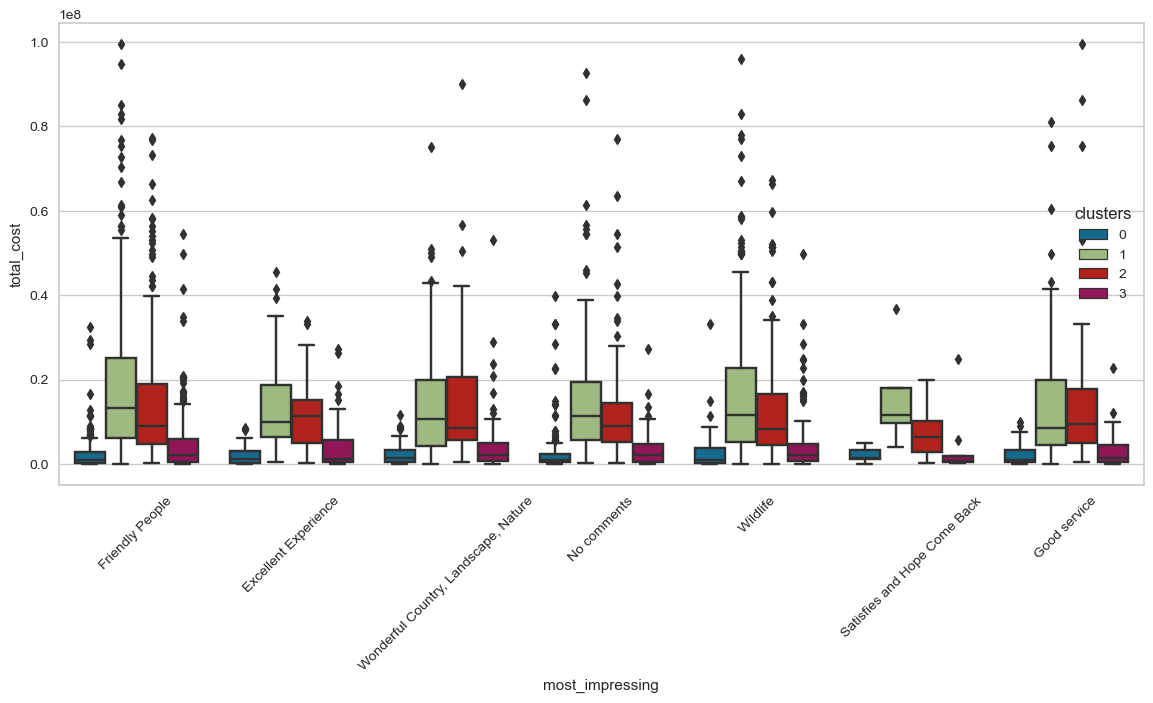

In [62]:
#mulitvariate analysis btw the total_cost vs purpose vs clusters feature
plt.figure(figsize=(14,6))
sns.boxplot(x="most_impressing",y="total_cost",hue="clusters",data=data3)
plt.xticks(rotation=45);


**observations**
- we can observe from the distribution of the new feature that by far from our dataset, we have the 1st cluster taking a large portion ofthe sample dataset with a 1200 observations, loosely followed by cluster 3 which has 850 data observations, then cluster 0 has 750 and the last being cluster 2, with aproximately 580 data points
- from looking at the total cost distribution vs the clusters feature, we can correctly infer that by far, cluster 1 and cluster 2 represent high value(high spending) tourists group, while cluster3 and cluster0 represents mostly low value(low spending) tourist group
- looking at the relationships accross age groups, we see that, though we have a good spread of the cluster amongst all age groups, there is a significantly higher spending power amongs the 65+ age group, while on the other end of the spectrum we have the lowest spending power amongst the 1-24 yrs age group

 

### Based on the analysis my recommendations to the Tanzanian Tourism board are

- Emphasize unique activities and experiences, highlight diverse travel arrangements.
- Promote comprehensive package deals, target first-time visitors with all-inclusive offers.
- Focus on family and group travel packages, highlight cost-effective packages.
- Promote diverse experiences, tailor messages to first-time visitors highlighting unique impressions.
- Promote luxury safari packages to older travelers through high end travel magazines and exclusive online platforms
